    
# <p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Marketing Campaign Analysis -  iFood CRM Data Analyst Case</p>

<img src="https://images.unsplash.com/photo-1454165804606-c3d57bc86b40?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80" width="500" height="600">


In this notebook you will find the analysis of the marketing campaign proposed for the iFood CRM Data Analyst Case.

<b>Name:</b> Filipe Chaves de Macedo

<b>E-mail:</b> lipe_macedo@msn.com

<b>Date:</b> January 29th 2022

### <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>
    
---
* [Data Preprocessing](#section_1)
    * [Import Modules and packages](#section_1_1)
    * [Knowing the dataset](#section_1_2)
    * [Preparing the data](#section_1_3)
    * [Feature Engineering](#section_1_4)
---
* [Exploratory Data Analysis](#section_2)
    
    * [Numerical features correlation](#section_2_1)
    * [Response rate analysis](#section_2_2)
---    
* [Customer segmentation](#section_3)
    
    * [Customer Segmentation using RFM analysis](#section_3_1)
    * [Customer Segmentation using K-means clustering](#section_3_2)
    
---    
* [Prediction model](#section_4)
    
    * [Prepraring the data to the model](#section_4_1)
    * [Best threshold for ROC Curve](#section_4_2)


#  <a class="anchor" id="section_1" style="color: red">1. Data Preprocessing</a>

#  <a class="anchor" id="section_1_1" style="color: red">1.1 Import Modules and packages</a>

In [30]:
import pandas as pd
import numpy as np
from datetime import date


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

#Prediction model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

### Util functions

In [31]:

#Function to create a barplotgraph using seaborn
def barplot_graph(x,y,dataset,ylabel,xlabel, title,y_limit, desl, color):
    plt.figure(figsize=(10,8))
    ax = sns.barplot(x =x, y=y, data=dataset, alpha=1, palette=color )
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.title(title, fontsize=18)
    plt.ylim(0, y_limit)
    plt.xticks(rotation=0)
    for p in ax.patches:        
        height = p.get_height()
        ax.text(fontsize=16, x = p.get_x()+(p.get_width()/2), 
        y = height+desl,
        s = '{:.2f}'.format(height),
        ha = 'center')
        
#Function to create a lineplotgraph using seaborn      
def lineplot_graph(x,y,dataset,ylabel,xlabel, title,y_limit, neg_ylimit, desl):
    plt.figure(figsize=(10,8))
    ax = sns.lineplot(data=campaign_results, x=x, y=y, markers=True, marker='o')
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.title(title, fontsize=18)
    plt.ylim(neg_ylimit, y_limit)
    plt.xticks(list (range(3,14)),rotation=0)
    for i, j in zip(x,y):
        ax.text(i-0.3, j+desl, j, fontsize=13)

# <a class="anchor" id="section_1_2" style="color: red">1.2 Knowing the data </a>

In [32]:
# Load the dataset
raw_ifood_df = pd.read_csv('ml_project1_data.csv')
raw_ifood_df.sort_values('Income', ascending=True).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,20,0,0,0,0,0,0,3,11,0
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,19,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,1,0,0,0,0,0,0,3,11,0


In [33]:
#Dataset information
raw_ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

With the command .info() we can see the information information about our dataset:
 - We have 2 <b>columns with categorical variables</b> and 27 <b>columns with numerical variables</b>
 - We have <b>Income column with missing data</b> in 24 obsertavions

In [34]:
#Distinct values in each column
raw_ifood_df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

With the command .nunique() we can see two columns with just one distinct value <b>Z_CostContact</b> and <b>Z_Revenue</b>, this columns can't provide util information and they will be dropped.


#  <a class="anchor" id="section_1_3" style="color: red">1.3 Preparing the data</a>

### Filling missing values

First the missing values need to be handle in the <b>Income</b> column. Usually the Income is connected with education level and age, let's evaluate if this is true in this case.

In [35]:
#Verify age and income corelation
# Create Customer Age Column
raw_ifood_df['Age'] = 2014 - raw_ifood_df['Year_Birth']
print('Correlation beetween Age and Income: {}'.format( raw_ifood_df['Age'].corr(raw_ifood_df['Income'])))

Correlation beetween Age and Income: 0.16179142819632983


Age is not high correlated with Income, maybe this is not a good filter to define missing incomes. Let's verify if the Education level impacts in the Income average

In [36]:
#Remove outlier of 666666 in the income
raw_ifood_df = raw_ifood_df[raw_ifood_df['Income']!=666666]

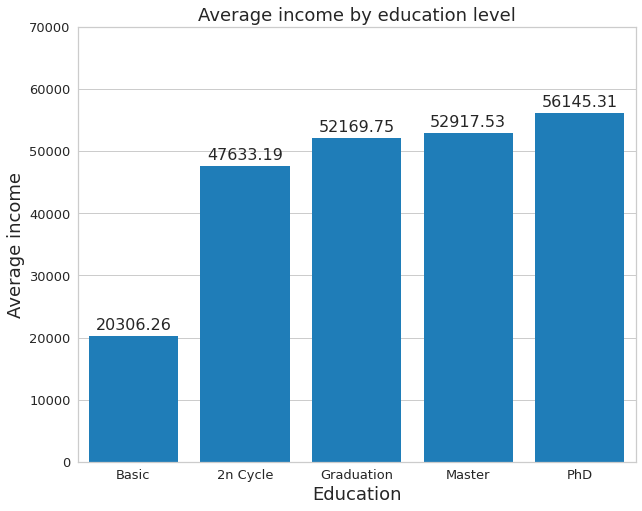

In [37]:
#Verify if the average income increase with the education level
edu_income = raw_ifood_df.groupby(by=["Education"]).mean()
edu_income = edu_income.reset_index()
edu_income = edu_income.reindex([1,0,2,3,4])
barplot_graph(edu_income['Education'],edu_income['Income'],edu_income,'Average income','Education',\
              'Average income by education level',70000, 1000, ['#0583D2'])

<i>Figure 1:</i> Bargraph with average income by education level

As we can see in the <i>Figure 1</i> the difference beetween the Phd average income and the Basic average income is pretty big and show us that the education level is connected with higher incomes. This column will be used to fill the null values with the mean income of each education level.

In [38]:
raw_ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntGoldProds         2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [42]:
mean_income_education = raw_ifood_df.copy()
mean_income_education = mean_income_education.groupby('Education')['Income'].mean().copy()
mean_income_education = mean_income_education.reset_index()

#Fill the null Incomes with the average salary 
null_rows = raw_ifood_df[raw_ifood_df['Income'].isnull()].index.tolist()
for row in null_rows:
    if raw_ifood_df.Education.iloc[row] == 'Graduation':
        raw_ifood_df.Income.iloc[row] = round((mean_income_education[mean_income_education['Education']=='Graduation'].values)[0][1],0)
    if raw_ifood_df.Education.iloc[row] == '2n Cycle':
        raw_ifood_df.Income.iloc[row] = round((mean_income_education[mean_income_education['Education']=='2n Cycle'].values)[0][1],0)
    if raw_ifood_df.Education.iloc[row] == 'Master':
        raw_ifood_df.Income.iloc[row] = round((mean_income_education[mean_income_education['Education']=='Master'].values)[0][1],0)
    else:
        raw_ifood_df.Income.iloc[row] = round((mean_income_education[mean_income_education['Education']=='PhD'].values)[0][1],0)

### Drop columns with one distinct value

In [44]:
#Drop Columns Z_CostContact and Z_Revenue with just onde distinct value
res = raw_ifood_df
for col in raw_ifood_df.columns:
    if len(raw_ifood_df[col].unique()) == 1:
        res = res.drop(col,axis=1)

raw_ifood_df = res

#  <a class="anchor" id="section_1_4" style="color: red">1.4 Feature Engineering</a>

Some columns with possible util information need to be converted or created

- <b>Dt_Customer</b> will de converted to days in the new column <b>Enroll_days</b>
- <b>Kidhome</b> and <b>Teenhome</b> will be create the column <b>Child_number</b>
- <b>Mnt</b> columns will be added to each other to create the column <b>Mnt_Total</b>
- <b>Num...Purchases</b> columns will be added to each other to create the column <b>Total_purchases</b>
- <b>Total_responses</b> column with all positive responses in the campaigns
- <b>Pos_response</b> binary column to know if the customer accepted at least one campaign

Obs.: We will use the data from the 5 campaign and the sample campaign to the exploratory analysis.

In [45]:
# Number of days as a customer
raw_ifood_df['Enroll_Days'] = (pd.to_datetime('2014-06-29') - pd.to_datetime(raw_ifood_df['Dt_Customer'])) // np.timedelta64(1,'D') 

In [46]:
#Number of children and teenager at home
raw_ifood_df['Child_number'] = raw_ifood_df['Kidhome'] + raw_ifood_df['Teenhome']

In [47]:
#Total amount spent
raw_ifood_df['Mnt_Total'] = raw_ifood_df['MntWines'] + raw_ifood_df['MntFruits']\
+ raw_ifood_df['MntMeatProducts'] + raw_ifood_df['MntFishProducts']\
+ raw_ifood_df['MntSweetProducts'] + raw_ifood_df['MntGoldProds']

In [48]:
#Total number of purchases
raw_ifood_df['Total_purchases'] =  raw_ifood_df['NumWebPurchases']\
+ raw_ifood_df['NumCatalogPurchases'] + raw_ifood_df['NumStorePurchases']

In [49]:
#Total number of responses in the 5 campaigns and sample campaign
raw_ifood_df['Total_responses'] = raw_ifood_df['AcceptedCmp1'] + raw_ifood_df['AcceptedCmp2']\
+ raw_ifood_df['AcceptedCmp3'] + raw_ifood_df['AcceptedCmp4'] + raw_ifood_df['AcceptedCmp5']+ raw_ifood_df['Response']

In [50]:
#Positive response at least in one campaign
raw_ifood_df['Pos_response'] = [1 if x >= 1 else 0 for x in raw_ifood_df['Total_responses']]

#  <a class="anchor" id="section_2" style="color: red">2. Exploratory Data Analysis</a>

##  <a class="anchor" id="section_2_1" style="color: red">2.1 Numerical features correlation</a>

Let's check how numerical features are correlated.

<AxesSubplot:>

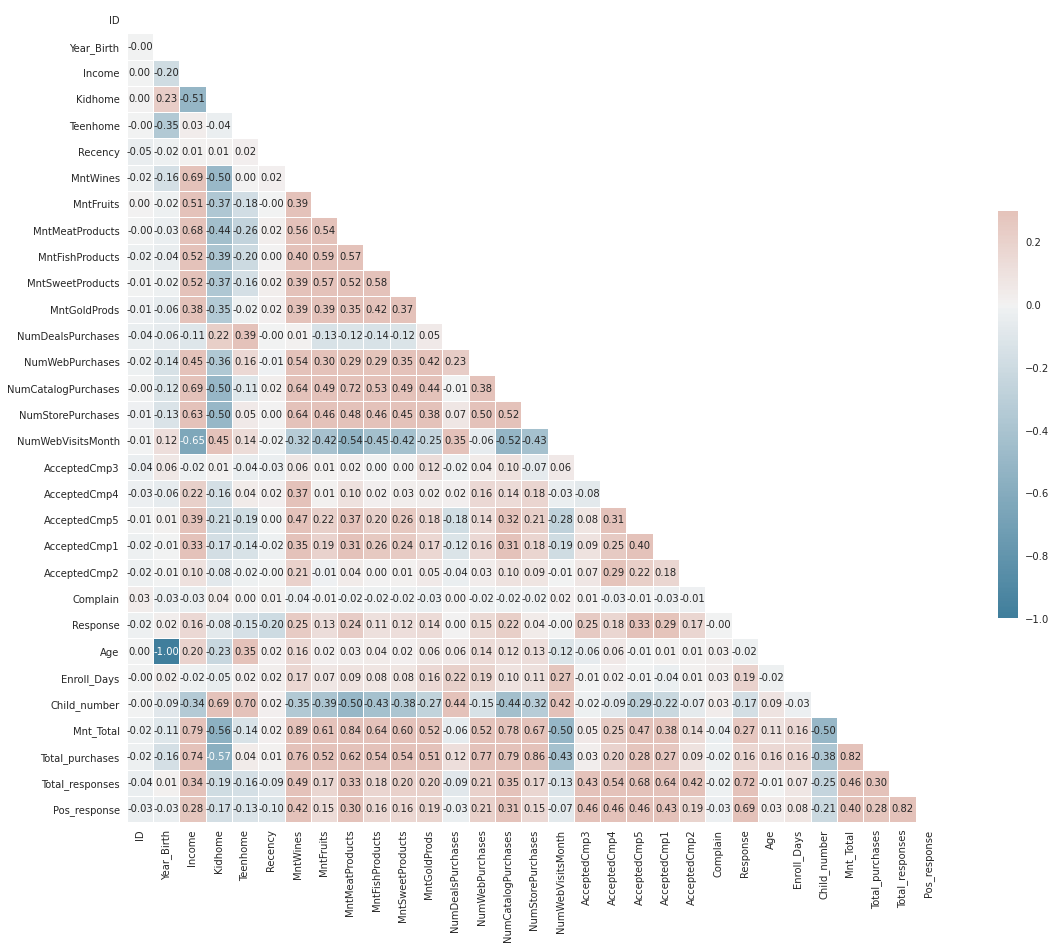

In [52]:

corr=raw_ifood_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(20, 15))


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

<i>Figure 2:</i> Heatmap with the value of pearson correlation between numerical features

### <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">NUMERICAL FEATURES CORRELATION INSIGHTS</p>
    

First let's define correlation ranges

| Correlation | Value |
|----|----|
| very highly correlated | 0.9 and 1.0 |
| highly correlated | 0.7 and 0.9|
| moderately correlated | 0.5 and 0.7|
| low correlation | 0.3 and 0.5|
| little if any correlation | less than 0.3|

<center><i>Table 1:</i> Correlation ranges explained</center>

1 - We can see a moderate negative correlation between variables like <b>Kidhome, Child_number</b> and <b>Mnt_Total </b> we can interpret this as: more kids less purchases;

2 - A high correlation between <b>Income</b> and <b>Mnt_Total </b> wich could means: higher the income more money the customer spend with us;

3 - A high correlation between <b>NumCatalogPurchases</b> and <b>MntMeatProducts</b> show us that our costumers usually buy meat using the catalog;

4 - The greater the amount spent by a customer, the greater the purchase of meat and wine the high correlation between this variables can show us this statement;

5 - We can see that the higher a customer spends, the less he visits the website. Where <b>Mnt_total</b> and <b>NumWebVisitsMonth</b> have a moderate negative correlation;

We can see another interesting correlations, but let's move on for now.

#  <a class="anchor" id="section_2_2" style="color: red">2.2 Response rate analysis</a>

Let's see how each variable in the customer profile is connected with the response in the last five campaigns and in the sample campaign evaluating the response rate in these six campaigns.

### Campaigns success rate

In [53]:
campaign_1_rate = round(raw_ifood_df['AcceptedCmp1'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_2_rate = round(raw_ifood_df['AcceptedCmp2'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_3_rate = round(raw_ifood_df['AcceptedCmp3'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_4_rate = round(raw_ifood_df['AcceptedCmp4'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_5_rate = round(raw_ifood_df['AcceptedCmp5'].sum()/raw_ifood_df.shape[0]*100,2)
campaign_6_rate = round(raw_ifood_df['Response'].sum()/raw_ifood_df.shape[0]*100,2)

In [54]:
d = {'Camp_Rate': [campaign_1_rate, campaign_2_rate, campaign_3_rate, campaign_4_rate, campaign_5_rate, campaign_6_rate],\
     'Camp_name': ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Sample Campaign']}
campaign_rate_df = pd.DataFrame(data=d)

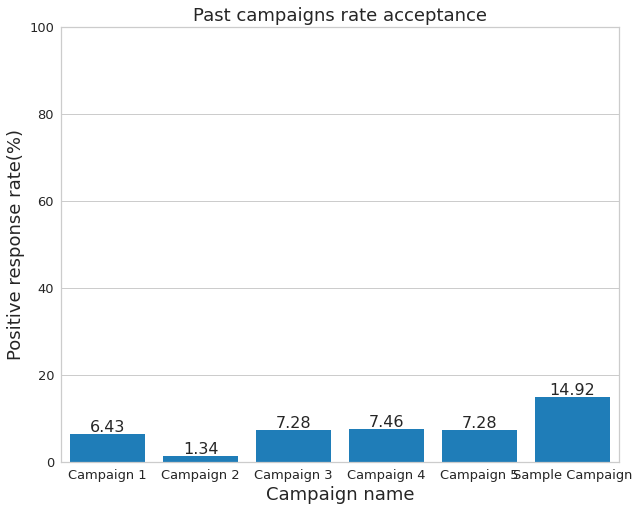

In [55]:
barplot_graph(campaign_rate_df['Camp_name'],campaign_rate_df['Camp_Rate'], campaign_rate_df,\
              'Positive response rate(%)','Campaign name', 'Past campaigns rate acceptance',100, 0.5,['#0583D2'])

<i>Figure 3:</i> Bargraph with the past campaings succes rate

The past campaings were very unsuccessful with the biggest succes rate of 14.92% in the sample campaign.

### Average spents from customer who accepted at least one offer x customer who didn't accept.

In [64]:
average_accept = raw_ifood_df[raw_ifood_df['Pos_response']>0]
average_neg = raw_ifood_df[raw_ifood_df['Pos_response']==0]

print('Average spent in stores of customer who accepted at least one offer: {}'.format(round(average_accept['Mnt_Total'].mean(),2)))
print('Average spent in stores of customer who didn\'t accept any offer: {}'.format(round(average_neg['Mnt_Total'].mean(),2)))

d = {'Avr_spent': [round(average_accept['Mnt_Total'].mean(),2), round(average_neg['Mnt_Total'].mean(),2)],\
                   'Class': ['Positive', 'Negative']}
average_spent_df = pd.DataFrame(data=d)

Average spent in stores of customer who accepted at least one offer: 1001.33
Average spent in stores of customer who didn't accept any offer: 458.35


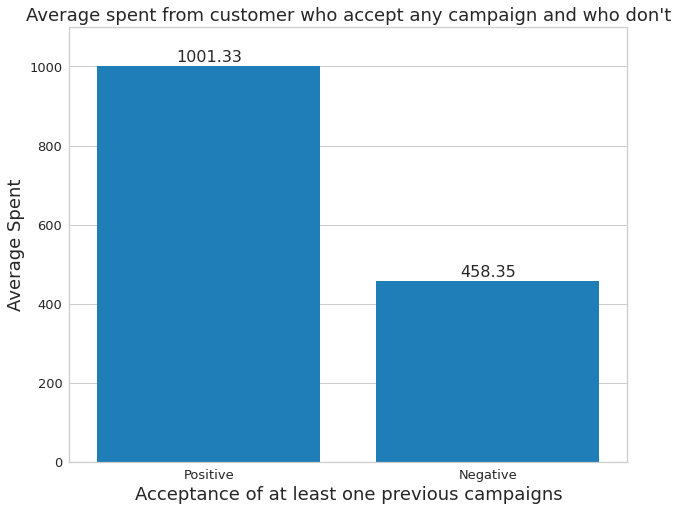

In [65]:
barplot_graph(average_spent_df['Class'],average_spent_df['Avr_spent'],average_spent_df,'Average Spent',\
              'Acceptance of at least one previous campaigns', 'Average spent from customer who accept any campaign and who don\'t',1100, 10,['#0583D2'])

<i>Figure 4:</i> Bargraph comparing the average spent between customers that accepted at least one offer in campaigns and who didn't accept.

We can see that our customers who have accepted offers from previous campaigns, on average spend more money on our products when compared to customers who have not.

### Average spend on each product category

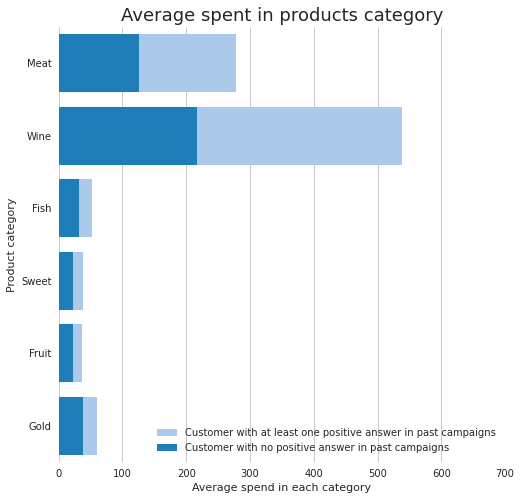

In [74]:
average_accept_meat = round(average_accept['MntMeatProducts'].mean(),2)
average_neg_meat = round(average_neg['MntMeatProducts'].mean(),2)
average_accept_wine = round(average_accept['MntWines'].mean(),2)
average_neg_wine = round(average_neg['MntWines'].mean(),2)
average_accept_fish = round(average_accept['MntFishProducts'].mean(),2)
average_neg_fish = round(average_neg['MntFishProducts'].mean(),2)
average_accept_sweet = round(average_accept['MntSweetProducts'].mean(),2)
average_neg_sweet = round(average_neg['MntSweetProducts'].mean(),2)
average_accept_fruits = round(average_accept['MntFruits'].mean(),2)
average_neg_fruits = round(average_neg['MntFruits'].mean(),2)
average_accept_gold = round(average_accept['MntGoldProds'].mean(),2)
average_neg_gold = round(average_neg['MntGoldProds'].mean(),2)

d = {'Avr_accept': [average_accept_meat, average_accept_wine, average_accept_fish, average_accept_sweet, average_accept_fruits, average_accept_gold],\
                   'Class': ['Meat', 'Wine', 'Fish', 'Sweet', 'Fruit', 'Gold']}
average_spent_accept = pd.DataFrame(data=d)

d = {'Avr_neg': [average_neg_meat, average_neg_wine, average_neg_fish, average_neg_sweet, average_neg_fruits, average_neg_gold],\
                   'Class': ['Meat', 'Wine', 'Fish', 'Sweet', 'Fruit', 'Gold']}
average_spent_neg = pd.DataFrame(data=d)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

plt.title('Average spent in products category', fontsize=18)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Avr_accept", y="Class", data=average_spent_accept, label="Customer with at least one positive answer in past campaigns", color="b")

# Plot the average spent
sns.set_color_codes("muted")
sns.barplot(x="Avr_neg", y="Class", data=average_spent_neg, label="Customer with no positive answer in past campaigns", color='#0583D2')

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=False)
ax.set(xlim=(0, 700), ylabel="Product category",
       xlabel="Average spend in each category")
sns.despine(left=True, bottom=True)

<i>Figure 5:</i> Horizontal bargraph with the average spent on each category

A large part of the customer spending is located in meat and wine products where customers who accepted a campaign spend on average twice as much when compared to customers who did not accept any campaign.

### Positive campaing response rate by education level

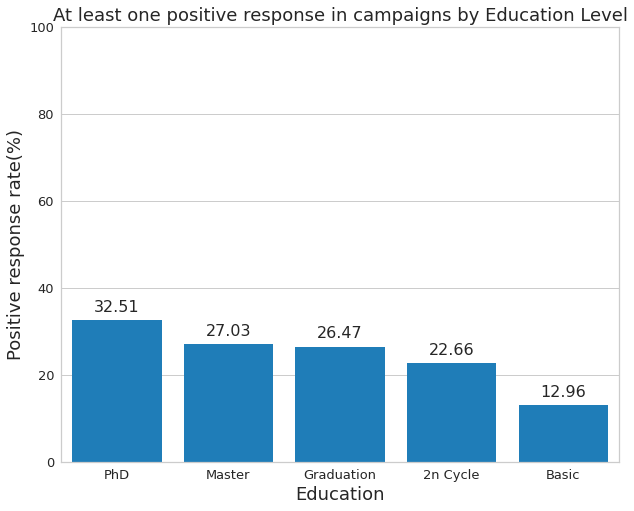

In [92]:
education_rate = round(raw_ifood_df.groupby('Education')['Pos_response'].mean().sort_values(ascending = False)*100,2)
education_rate = education_rate.reset_index()
barplot_graph(education_rate['Education'],education_rate['Pos_response'],education_rate,'Positive response rate(%)',\
              'Education', 'At least one positive response in campaigns by Education Level',100, 2,['#0583D2'])

<i>Figure 6:</i> Bargraph with the positive response rate from who accepted in at least one campaign on each education level

We can see that 32,51% of the PhD accepted the offer in at least one of the six campaigns. Another good insight is the increase in offer acceptance as education level increases

### Positive campaing response rate by marital status

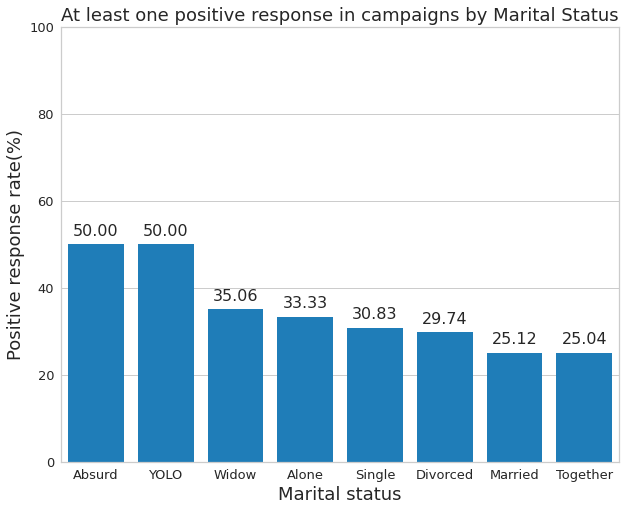

In [93]:
marital_rate = round(raw_ifood_df.groupby('Marital_Status')['Pos_response'].mean().sort_values(ascending = False)*100,2)
marital_rate = marital_rate.reset_index()
barplot_graph(marital_rate['Marital_Status'],marital_rate['Pos_response'],marital_rate,\
              'Positive response rate(%)','Marital status', 'At least one positive response in campaigns by Marital Status',100, 2,['#0583D2'])

<i>Figure 7:</i> Bargraph with the positive response rate from who accepted at least one campaign on each marital status

We can see people living wihtout a partner are more likely to accept the campaigns offer.

### Positive campaing response rate by children at home

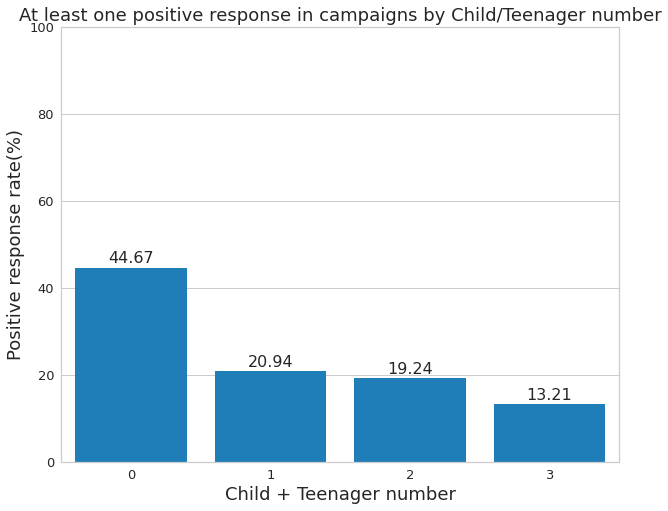

In [94]:
child_rate = round(raw_ifood_df.groupby('Child_number')['Pos_response'].mean().sort_values(ascending = False)*100,2)
child_rate = child_rate.reset_index()
barplot_graph(child_rate['Child_number'],child_rate['Pos_response'],child_rate,'Positive response rate(%)',\
              'Child + Teenager number', 'At least one positive response in campaigns by Child/Teenager number',100, 1,['#0583D2'])

<i>Figure 7:</i> Bargraph with the positive response rate from who accepted at least one campaign by number of children added the number of teenagers

There is a higher response rate from people with no children at home what probably is connected with no partners previous analysis.

### Positive campaing response rate by number of purchases

In [78]:
#Verify the minimum and maximum number of purchases
print('Min number of purchases: {}'.format(raw_ifood_df['Total_purchases'].min()))
print('Max number of purchases: {}'.format(raw_ifood_df['Total_purchases'].max()))

Min number of purchases: 0
Max number of purchases: 32


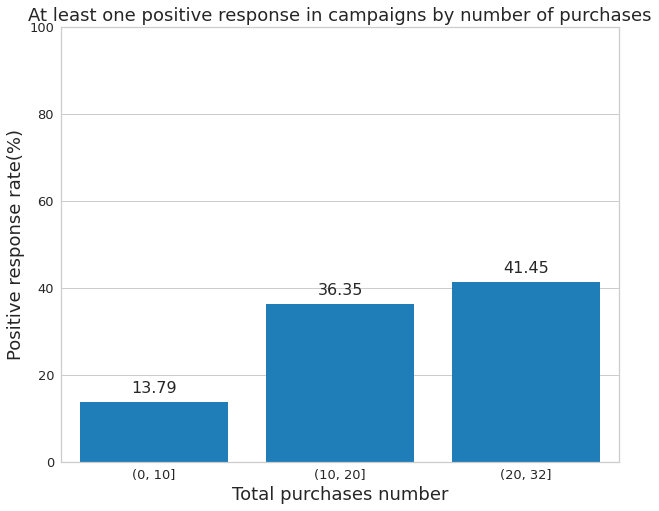

In [95]:
#Create cut points in the number of purchases to better analyse
#bins defined to similar number of observations in each category
bins = [0,10,20,32]
s1 = pd.cut(raw_ifood_df.Total_purchases, bins = bins)
purchases_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
purchases_rate = round(purchases_rate.groupby('Total_purchases')['Pos_response'].mean().sort_values(ascending = False)*100,2)
purchases_rate = purchases_rate.reset_index()
purchases_rate.head(20)
barplot_graph(purchases_rate['Total_purchases'],purchases_rate['Pos_response'],purchases_rate,\
              'Positive response rate(%)','Total purchases number', 'At least one positive response in campaigns by number of purchases',100, 2,['#0583D2'])

<i>Figure 8:</i> Bargraph with the positive response rate from who accepted at least one campaign by total purchases made by the customer

We can see that the more purchases a consumer has, the more likely he is to accept the campaign offer.

### Positive campaing response rate by recency

In [81]:
#Verify the minimum and maximum number of purchases
print('Min days since the last purchases: {}'.format(raw_ifood_df['Recency'].min()))
print('Max days since the last purchases: {}'.format(raw_ifood_df['Recency'].max()))

Min days since the last purchases: 0
Max days since the last purchases: 99


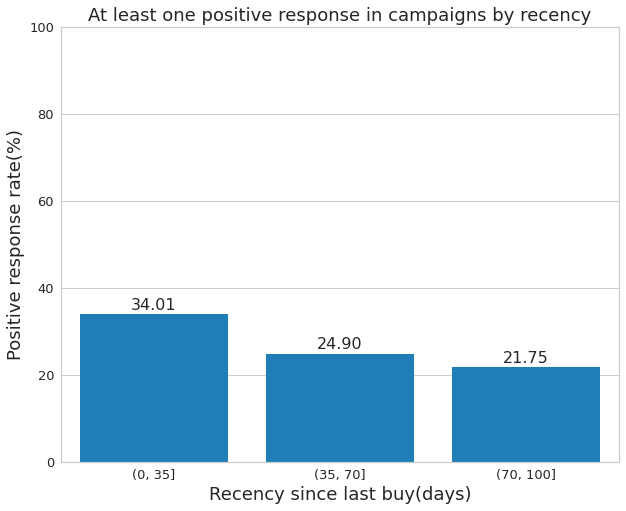

In [96]:
#Create cut points in the number of days
#bins defined to similar number of observations in each category
bins = [0,35,70,100]
s1 = pd.cut(raw_ifood_df.Recency, bins = bins)
recency_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
recency_rate = round(recency_rate.groupby('Recency')['Pos_response'].mean().sort_values(ascending = False)*100,2)
recency_rate = recency_rate.reset_index()
barplot_graph(recency_rate['Recency'],recency_rate['Pos_response'],recency_rate,'Positive response rate(%)',\
              'Recency since last buy(days)', 'At least one positive response in campaigns by recency',100, 1,['#0583D2'])

<i>Figure 9:</i> Bargraph with the positive response rate from who accepted at least one campaign by recency in days

Customers who buy more frequently are reacting to the marketing campaign more positively.

### Positive campaing response rate by age

In [83]:
#Verify the minimum and maximum number of purchases
print('Min age: {}'.format(raw_ifood_df['Age'].min()))
print('Max age: {}'.format(raw_ifood_df['Age'].max()))

Min age: 18
Max age: 121


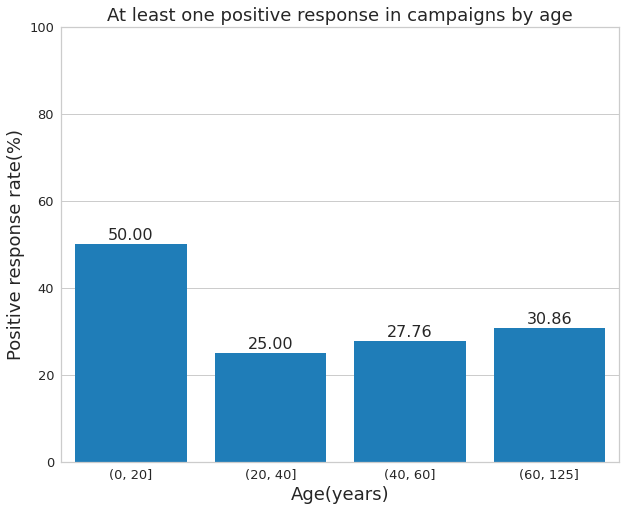

In [97]:
#Create cut points in the number of purchases to better analyse
#bins defined to similar number of observations in each category
bins = [0,20,40,60,125]
s1 = pd.cut(raw_ifood_df.Age, bins = bins)
recency_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
recency_rate = round(recency_rate.groupby('Age')['Pos_response'].mean().sort_values(ascending = False)*100,2)
recency_rate = recency_rate.reset_index()
barplot_graph(recency_rate['Age'],recency_rate['Pos_response'],recency_rate,'Positive response rate(%)',\
              'Age(years)', 'At least one positive response in campaigns by age',100, 1,['#0583D2'])

<i>Figure 10:</i> Bargraph with the positive response rate from who accepted at least one campaign by age

Customer under 20 years accepted the campaign offer with a higher frequency followed for 60+ customers, but with a big difference in percentage.

### Positive campaing response rate by amount spent

In [85]:
#Verify the minimum and maximum number of purchases
print('Min amount spent: {}'.format(raw_ifood_df['Mnt_Total'].min()))
print('Max amount spent: {}'.format(raw_ifood_df['Mnt_Total'].max()))

Min amount spent: 5
Max amount spent: 2525


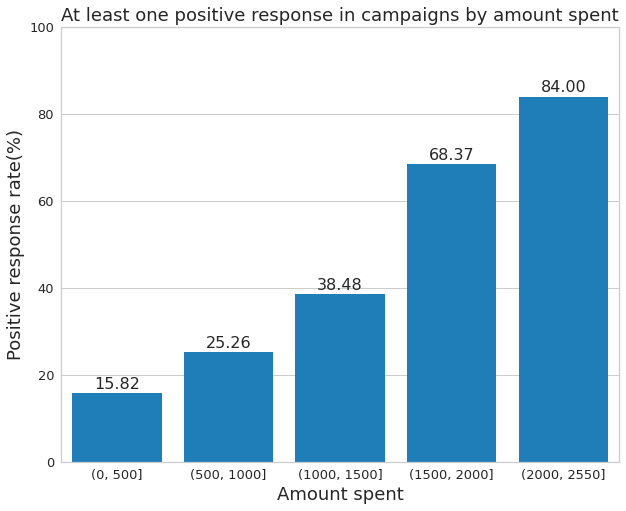

In [98]:
#Create cut points in the amount ranges
#bins defined to similar number of observations in each category
bins = [0,500,1000,1500,2000,2550]
s1 = pd.cut(raw_ifood_df.Mnt_Total, bins = bins)
recency_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
recency_rate = round(recency_rate.groupby('Mnt_Total')['Pos_response'].mean().sort_values(ascending = False)*100,2)
recency_rate = recency_rate.reset_index()
barplot_graph(recency_rate['Mnt_Total'],recency_rate['Pos_response'],recency_rate,'Positive response rate(%)',\
              'Amount spent', 'At least one positive response in campaigns by amount spent',100, 1, ['#0583D2'])

<i>Figure 11:</i> Bargraph with the positive response rate from who accepted at least one campaign by amount spent by customer

Customers who spend more in our stores are more likely to accept offers from campaigns.

### Positive campaing response rate by income

In [87]:
#Verify the minimum and maximum number of purchases
print('Min income: {}'.format(raw_ifood_df['Income'].min()))
print('Max income: {}'.format(raw_ifood_df['Income'].max()))

Min income: 1730.0
Max income: 162397.0


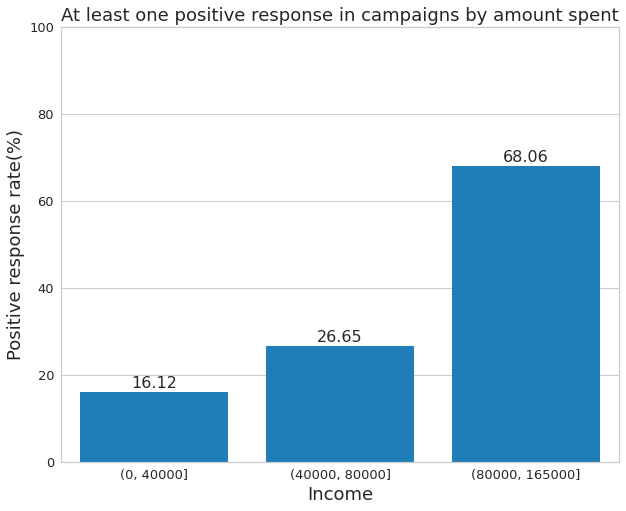

In [108]:
#Create cut points in the amount ranges
#bins defined to similar number of observations in each category
bins = [0,40000,80000,165000]
s1 = pd.cut(raw_ifood_df.Income, bins = bins)
recency_rate= pd.concat([s1, raw_ifood_df.Pos_response], axis = 1)
recency_rate = round(recency_rate.groupby('Income')['Pos_response'].mean().sort_values(ascending = False)*100,2)
recency_rate = recency_rate.reset_index()
barplot_graph(recency_rate['Income'],recency_rate['Pos_response'],recency_rate,'Positive response rate(%)',\
              'Income', 'At least one positive response in campaigns by amount spent',100, 1, ['#0583D2'])

<i>Figure 11:</i> Bargraph with the positive response rate from who accepted at least one campaign by income

### <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">RESPONSE RATE ANALYSIS INSIGHTS</p>
    
   
    
    
    

 Insights we have after this brief first analysis:
    
1 - People with a <b> higher level of education </b> are more susceptible to positive responses to campaigns;
    
2 - We can see that people <b>living without a partner</b> are more likely to accept the offer in campaigns;
    
3 - People with <b>no children at home</b> accepted the campaing offer in a rate of 44,67% what probably is connected with no partners previous analysis, while people with children at home accepted in a max rate of 20,94%;
    
4 - Customers with <b>higher income</b> accepted the campaign more than the lower incomes.

#  <a class="anchor" id="section_3" style="color: red">3. Customer segmentation</a>

#  <a class="anchor" id="section_3_1" style="color: red">3.1 Customer Segmentation using RFM analysis</a>

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. Once we have this three columns in our dataset we can use this simple, but sometimes very effective.

### RFM concatenating the scores

In [ ]:
rfm = raw_ifood_df[['ID','Recency', 'Total_purchases', 'Mnt_Total']].copy()

rfm['r_quartile'] = pd.qcut(raw_ifood_df['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(raw_ifood_df['Total_purchases'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(raw_ifood_df['Mnt_Total'], 4, ['4','3','2','1'])

rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)

rfm.sort_values(by='RFM_Score').head()


In [ ]:
rfm['RFM_Score'].sort_values().unique()

Now we can segment our customers in groups like in the table bellow, of course this is an approach with no much precision but very used in many cases when trying to segment customers.


|Segment|RFM Score|Description|Marketing|
|:---:|:---:|:---:|:---:|
|Best Customers|111|Bought most recently and most often, and spend the most| No price incentives, new products, and loyalty programs|
|Loyal Customers|X1X|Buy most frequently|Use R and M to further segment|
|Big Spenders|XX1| Spend the most|Market your most expensive products|
|Almost Lost|311| Haven't purchased for some time, but purchased frequently and spend the most|Aggressive price incentives|
|Lost Customers|411|Haven't purchased for some time, but purchased frequently and spend the most|Aggressive price incentives|
|Lost Cheap Customers|444| Last purchased long ago, purchased few, and spent little| Don't spend too much trying to re-acquire|

In [ ]:
best_cons = rfm.query('RFM_Score=="111"')
loyal_cons = rfm.query('RFM_Score=="112" or RFM_Score=="113" or RFM_Score=="114"\
                        or RFM_Score=="212" or RFM_Score=="213" or RFM_Score=="214" or RFM_Score=="312" or RFM_Score=="313"\
                       or RFM_Score=="314" or RFM_Score=="412" or RFM_Score=="413" or RFM_Score=="414"')
big_cons = rfm.query('RFM_Score=="121" or RFM_Score=="131"  or RFM_Score=="141"\
                        or RFM_Score=="211" or RFM_Score=="221" or RFM_Score=="231" or RFM_Score=="241"\
                        or RFM_Score=="321" or RFM_Score=="331" or RFM_Score=="341"\
                        or RFM_Score=="421" or RFM_Score=="431" or RFM_Score=="441"')
almost_cons = rfm.query('RFM_Score=="311"')
lost_cons = rfm.query('RFM_Score=="411"')
lost_cheap_cons = rfm.query('RFM_Score=="444"')

In [ ]:
import squarify
labels = ['Best Customers', 'Loyal Customers', 'Big Spenders', 'Almost Lost', 'Lost Customers', 'Lost Cheap\nCustomers']
data = [best_cons['ID'].count(), loyal_cons['ID'].count(), big_cons['ID'].count(), almost_cons['ID'].count(), lost_cons['ID'].count(), lost_cheap_cons['ID'].count()]
plt.figure(figsize=(6,6))
squarify.plot(sizes=data, label=labels, color=['#fafa6e','#77d183', '#3fb78d', '#008d8c', '#0b717e', '#2a4858'])
plt.axis('off')
plt.show()

### RFM with the sum of scores

But we can use another approach, we will sum the quartiles and categorizing the customers according to the RFM score sum.

In [ ]:
rfm['RFM_Score_sum'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm.head()

In [ ]:
rfm_join = rfm[['ID','RFM_Score_sum']]
joined_data = raw_ifood_df.set_index('ID').join(rfm_join.set_index('ID'))
joined_data = joined_data.reset_index()

In [ ]:
best_customers = joined_data[joined_data['RFM_Score_sum']<=3]  
customer_in_group = best_customers.groupby('RFM_Score_sum')['Response'].sum()
customer_in_group

In [ ]:
range_n_scores = list (range(3,13))
campaign_results = pd.DataFrame(columns=['Contemplated_groups','RFM_Score', 'Customers_in_group', 'Contacted_customers','Campaign_cost','Sold_gadgets','Campaign_revenue','Group_Profit', 'Profit', 'ROI'],\
                  index=[3,4,5,6,7,8,9,10,11,12])

for n_score in range_n_scores:
    best_customers = joined_data[joined_data['RFM_Score_sum']<=n_score]  
    customer_in_group = best_customers.groupby('RFM_Score_sum')['ID'].count()
    gadgets_in_group = best_customers.groupby('RFM_Score_sum')['Response'].sum()
    #print(gadgets_in_group)
    campaign_results.loc[n_score] = pd.Series({\
                                               'Contemplated_groups': list(range(3,n_score+1)),\
                                               'RFM_Score': n_score,\
                                               'Customers_in_group': customer_in_group.values[n_score-3],\
                                               'Contacted_customers':best_customers.shape[0],\
                                               'Campaign_cost':round(best_customers.shape[0]*6720/2240,2),\
                                               'Sold_gadgets':round(best_customers['Response'].sum(),2),\
                                               'Campaign_revenue':round(best_customers['Response'].sum()*3674/334,2),\
                                               'Group_Profit':round((gadgets_in_group.values[n_score-3]*3674/334) - (customer_in_group.values[n_score-3]*6720/2240),2),\
                                               'Profit':round((best_customers['Response'].sum()*3674/334)-(best_customers.shape[0]*6720/2240),2),\
                                               'ROI':round(100*(((best_customers['Response'].sum()*3674/334)-(best_customers.shape[0]*6720/2240))/(best_customers.shape[0]*6720/2240)),2),\
                                              })
    
campaign_results.head(10)


In [ ]:
campaign_results['RFM_Score'] = campaign_results['RFM_Score'].astype(float)
campaign_results['Profit'] = campaign_results['Profit'].astype(float)
campaign_results['ROI'] = campaign_results['ROI'].astype(float)
campaign_results['Customers_in_group'] = campaign_results['Customers_in_group'].astype(int)
campaign_results['Sold_gadgets'] = campaign_results['Sold_gadgets'].astype(int)

In [ ]:
lineplot_graph(campaign_results['RFM_Score'],campaign_results['Profit'],campaign_results,'Campaign Profit(MU)','Customers group cut off', 'Profit evolution when new groups are included in the campaign',600,-3500, 100)

In [ ]:
lineplot_graph(campaign_results['RFM_Score'],campaign_results['ROI'],campaign_results,'ROI(%)','Customers group cut off', 'ROI evolution when new groups are included in the campaign',100,-100, 5)

In [ ]:
lineplot_graph(campaign_results['RFM_Score'],campaign_results['Sold_gadgets'],campaign_results,'Sold gadgets','Customers group cut off', 'Gadgets sold evolution when new groups are included in the campaign',400,0, 10)

We can see that contacting the first two groups <b>3</b> and <b>4</b> we have the best Profit and contacting only group <b>3</b> we have the best ROI 

#  <a class="anchor" id="section_3_2" style="color: red">3.2 Customer Segmentation using K-means clustering</a>

### Encoding categorical variables.

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(raw_ifood_df, columns=['Marital_Status', 'Education'], drop_first=False )

### Drop unused columns

In [ ]:
#Drop unused columns and the Response, Pos_response and Total_responses column to not influence in the segmentation
dum_df = dum_df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Response', 'Total_responses', 'Pos_response'], axis=1)
dum_df.head()

In [ ]:
dum_df.columns

### Scaling columns

In [ ]:
scaler = StandardScaler()
scaler.fit(dum_df)
df_s = pd.DataFrame(scaler.transform(dum_df),columns= dum_df.columns )
df_s.head()

In [ ]:
df_s.columns

### PCA to dimensionality reduction

In [ ]:
# Do feature scaling
sc = StandardScaler()
X_scaled = df_s

pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)

In accord to Kaiser criterion: The Kaiser rule is to drop all components with eigenvalues under 1.0, so we will keep only 15 factors

In [ ]:
### PCA reduction
#3. Reducing dimentions to 3 with the PCA usage
pca = PCA(n_components=15, random_state=42)
pca.fit(df_s)
df_pca = pd.DataFrame(pca.transform(df_s), columns=(["f1","f2", "f3","f4","f5", "f6","f7","f8", "f9",\
                                                    "f10","f11", "f12","f13","f14", "f15"]))
print('Result table after perfoming encoding, scaling and PCA methods')
df_pca.head()

In [ ]:
# 4. Performing Elbow Method
plt_elb = KElbowVisualizer(KMeans(random_state=45), k=10)
plt_elb.fit(df_pca)
plt_elb.show();

In acord with Elbow method we will segment the customer in 4 groups

In [ ]:
groups = 4
kmeans = KMeans(groups, random_state=45)
kmeans.fit(df_pca)
predictions = kmeans.predict(df_pca)

In [ ]:
kmeans_df = raw_ifood_df.copy()
kmeans_df['Clusters'] = predictions

In [ ]:
plt.figure(figsize=(10,8))
plt.ylabel('Spent amount', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title("Cluster's Profile Based On Income And Spending", fontsize=18)
pl = sns.scatterplot(data = kmeans_df,x=kmeans_df["Income"], y=kmeans_df["Mnt_Total"],hue=kmeans_df["Clusters"]\
                    ,palette=['#06115b','#0083ff','#10809c','#00cdff'])
#pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
kmeans_0 = kmeans_df[kmeans_df["Clusters"]==0]
kmeans_1 = kmeans_df[kmeans_df["Clusters"]==1]
kmeans_2 = kmeans_df[kmeans_df["Clusters"]==2]
kmeans_3 = kmeans_df[kmeans_df["Clusters"]==3]

In [ ]:
range_n_scores = list(range(0,groups))
campaign_results = pd.DataFrame(columns=['Contemplated_groups','Kmeans_group', 'Customers_in_group', 'Contacted_customers','Campaign_cost','Sold_gadgets','Campaign_revenue', 'Profit', 'ROI'],\
                  index=range_n_scores)

for n_score in range_n_scores:
    best_customers = kmeans_df[kmeans_df['Clusters']==n_score]  
    customer_in_group = kmeans_df.groupby('Clusters')['ID'].count()
    campaign_results.loc[n_score] = pd.Series({\
                                               'Contemplated_groups': n_score,\
                                               'Kmeans_group': n_score,\
                                               'Customers_in_group': customer_in_group.values[n_score],\
                                               'Contacted_customers':best_customers.shape[0],\
                                               'Campaign_cost':round(best_customers.shape[0]*6720/2240,2),\
                                               'Sold_gadgets':round(best_customers['Response'].sum(),2),\
                                               'Campaign_revenue':round(best_customers['Response'].sum()*3674/334,2),\
                                               'Profit':round((best_customers['Response'].sum()*3674/334)-(best_customers.shape[0]*6720/2240),2),\
                                               'ROI':round(100*(((best_customers['Response'].sum()*3674/334)-(best_customers.shape[0]*6720/2240))/(best_customers.shape[0]*6720/2240)),2),\
                                              })
    
campaign_results.head(10)

We can see that among the four groups, only one had a positive return of 519, where 124 customers were contacted and 81 gadgets were sold. If the campaign was made only with users in this group, the ROI would be 139,52%. Let's analyze the characteristics of this group to have an idea of what makes it different from the others.

In [ ]:
ax = sns.boxplot(x="Clusters", y="Income", data=kmeans_df)

We can see that the group with the highest return has the highest median in the income variable.

In [ ]:
ax = sns.boxplot(x="Clusters", y="Mnt_Total", data=kmeans_df)

We can see that the group with the highest return has the highest median in the variable that shows the total amount spent on products of our company.

In [ ]:
ax = sns.boxplot(x="Clusters", y="Total_purchases", data=kmeans_df)

The group with the highest return has the highest median in the variable that shows the total purchases made in our company.

In [ ]:
ax = sns.boxplot(x="Clusters", y="Total_responses", data=kmeans_df)

The group with the highest return gave much more positive responses to previous marketing campaigns when compared to the other groups.

In [ ]:
ax = sns.boxplot(x="Clusters", y="Child_number", data=kmeans_df)

Customers who are in the group with the best return have practically no children or teenagers at home.

### <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#EA1D2C;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">KMEANS SEGMENTATION RESULTS</p>
    

- With the Kmeans segmentation method, using just the best cluster of customers we were able to decrease the budget to <b>372MU</b> and increase the campaign profit to <b>519MU</b> with an ROI of <b>139,52%</b>.
- We found that the group with the best profit had higher medians in income, total spend, number of purchases and positive responses in previous marketing campaigns.
- Now we know that most of the clients in the best group don't have children or teenagers at home.
- We reduced the number of gadgets sold to <b>81</b>.(This is not good We will try to change this with a predictive model, increasing the profits and the number of sold gadgets)

#  <a class="anchor" id="section_4" style="color: red">4. Prediction model</a>

In the predicition we will use a Logístic Regression to make classification between customers who will accept the campaign offer in the next campaign, Logístic Regression was the obvious choice because of it's simplicity and because the característics of our data. 

##  <a class="anchor" id="section_4_1" style="color: red">4.1 Prepraring the data to the model</a> 

In [ ]:
#Create a copy of our data
model_df = raw_ifood_df.copy()
#Let's add the segmentation groups to see if these are good variables to use in the predictions
model_df['RFM_Score_sum'] = rfm['RFM_Score_sum']
model_df['Cluster_kMeans'] = kmeans_df["Clusters"]
#Total number of responses in the 5 campaigns excluding the sample campaign in this case our target
model_df['5_responses'] = model_df['AcceptedCmp1'] + model_df['AcceptedCmp2']\
+ model_df['AcceptedCmp3'] + model_df['AcceptedCmp4'] + model_df['AcceptedCmp5']
#Positive response at least in one campaign excluding the sample campaign in this case our target
model_df['Pos_response_5'] = [1 if x >= 1 else 0 for x in model_df['5_responses']]
# generate binary values using get_dummies
model_df = pd.get_dummies(model_df, columns=['Marital_Status', 'Education', 'Cluster_kMeans'], drop_first=False )
#Droping variables with target information and unused columns
model_df = model_df.drop(['Total_responses','Pos_response', 'Dt_Customer'],axis=1)
model_df.columns

In [ ]:
#Let's see the correlation between the Target and independent variables
data_cor=abs(model_df.corr()['Response']).sort_values(ascending=False)
data_cor=data_cor.to_frame()
data_cor

Variables will be included in the model in accord of it's correlation with the target

In [ ]:
#Let's create X and y datasets
X = model_df.drop('Response', axis=1)
y = model_df['Response']

One of the critical assumptions of logistic regression is that the relationship between the logit of the outcome and each continuous independent variable is linear.

In [ ]:
#Setting the variables near by a gaussian distribuiton
data_PT = X.copy()
for col in X.columns:
    data_PT[col] = PowerTransformer().fit_transform(X[[col]]).flatten()

In [ ]:
#Separate the data to train and to test (70/30)
X_train, X_test, y_train, y_test = train_test_split(data_PT, y, test_size=0.3, random_state=42)
plt.figure(figsize = [6,4])
sns.countplot(x = y_train)

As we can see we have a problem of Imbalanced classification, there are many techniques that may be used do handle this problem, such as resampling the training dataset using SMOTE or another algoritm, trying to solve this problem in a simple way we will work on the adjusting the output threshold in the Logistic Regression, but first let's take a look in the results before the threshold adjusting.

In [ ]:
roc_max = 0

for feat_num in list(range(2,46)):
    
    Features_to_use = data_cor.index[1:feat_num].values
    Features_to_use
    
    #Separate the data to train and to test (70/30)
    X_train, X_test, y_train, y_test = train_test_split(data_PT[Features_to_use], y, test_size=0.3, random_state=42)

    clf = LogisticRegression(random_state=42, solver='liblinear')
    clf.fit(X_train, y_train)
    prediction=clf.predict(X_test)
    
    #print used variables
    #print('Vars used in the model: ', Features_to_use)
    # confusion matrix
    cm = confusion_matrix(y_test, prediction)
    #print()
    #in percentage
    cm_model_fract = cm / cm.sum(axis=1).reshape(-1,1)
    cm_model_percent = 100*cm_model_fract
        
    #print ('Confusion Matrix : \n', cm_model_percent.round(2))
    #print()
    sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])

    specificity = cm[0][0] / (cm[0][0] + cm[0][1])

    #print('Sensitivity: ',round(sensitivity,2) )
    #print('Specificity: ',round(specificity,2) )
    
    roc_calc = roc_auc_score(y_test, prediction).round(4)
    #print('ROC AUC: ', roc_calc)
    
    #print('-----------------------------------------------------')
    
    if roc_calc > roc_max:
        best_vars = Features_to_use
        roc_max = roc_calc

print('MODEL WITH THRESHOLD 0.5:')
print()
print('Best ROC AUC value: ', roc_max)
print()
print('Used variables in the model:', best_vars)


#Separate the data to train and to test (70/30)
X_train, X_test, y_train, y_test = train_test_split(data_PT[best_vars], y, test_size=0.3, random_state=42)

clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)

def conf_matrix(cm_matrix):
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm_matrix.round(1)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
conf_matrix(cm_model_percent)

As expected the class with less samples had a bad classification, let's try to adjust the threshold to improve this classification. 

##  <a class="anchor" id="section_4_2" style="color: red">4.2 Best threshold for ROC Curve</a>  

A ROC curve is a diagnostic plot that evaluates a set of probability predictions made by a model on a test dataset. The area under the ROC Curve, so-called ROC AUC, provides a single number to summarize the performance of a model in terms of its ROC Curve with a value between 0.5 (no-skill) and 1.0 (perfect skill).

In [ ]:
# predict probabilities of the best model found before, first column prob to be 0 and second column prob to be 1
yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

In [ ]:
# calculate roc curves returning the false positive rate, true positive rate and the thresholds
fpr, tpr, thresholds = roc_curve(y_test, yhat)

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

In [ ]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold = thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold, gmeans[ix]))

In [ ]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
#predictions with threshold adjusted
predict_adjusted = (clf.predict_proba(X_test) >= best_threshold).astype(int)

#calc confusion matrix
cm = confusion_matrix(y_test, predict_adjusted[:,1])
#in percentage
cm_model_fract = cm / cm.sum(axis=1).reshape(-1,1)
cm_model_percent = 100*cm_model_fract

conf_matrix(cm_model_percent)

roc_calc = roc_auc_score(y_test, predict_adjusted[:,1]).round(4)
print('ROC AUC: ', roc_calc)



As we can see we improved the true positive class and now we have 83,5% of right predictions in this class and 80,2% in the true negatives